In [3]:
# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import multiprocessing
module_path = os.path.abspath(os.path.join('./')) # or the path to your source code
sys.path.insert(0, module_path)

In [4]:
%reload_ext autoreload

In [151]:
scenario_table = {}
scenario_df = pd.DataFrame()

# Deepso first

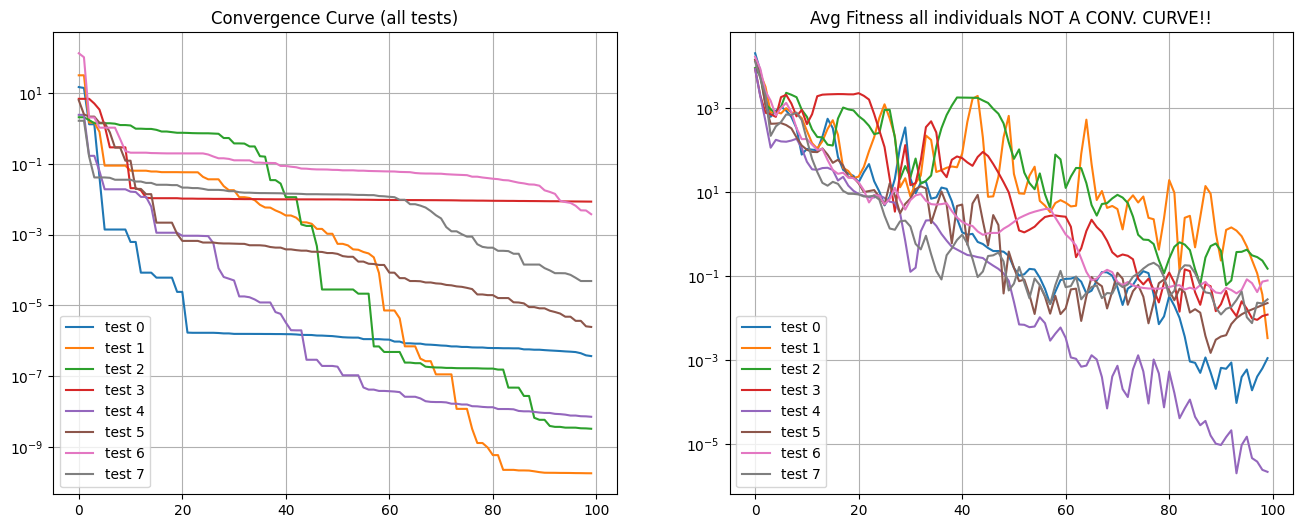

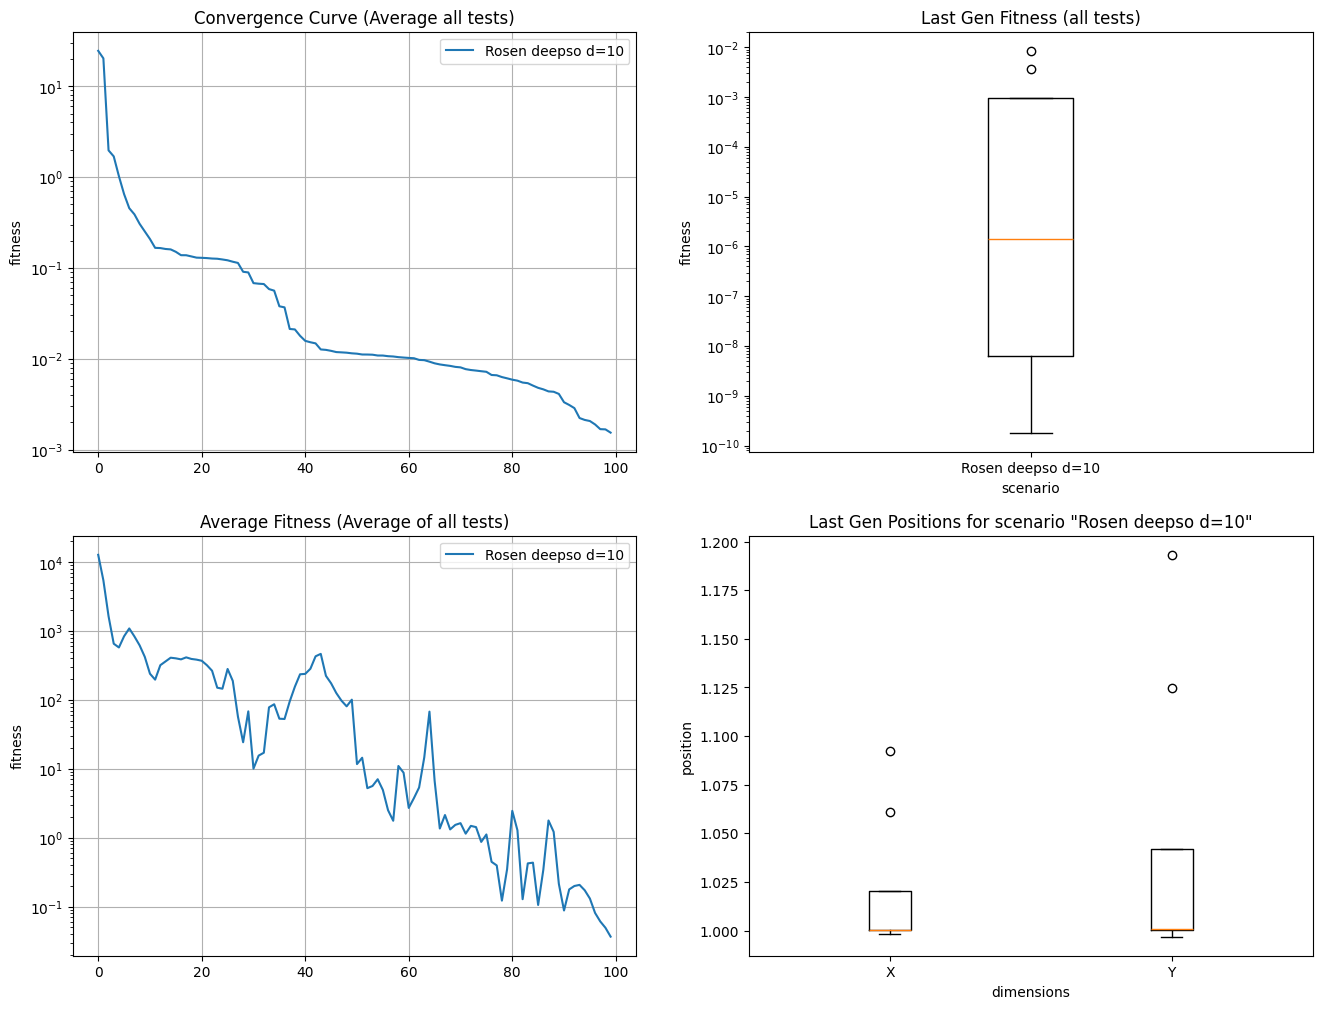

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rosen deepso d=10,deepso,100,30,0.1,0.7,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",1.824183e-10,0.008514,0.00154,0.002907


In [157]:
scenario_table = {}
scenario_df = pd.DataFrame()

from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualDEEPSO
import numpy as np
import pandas as pd

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rosen deepso d=10"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=2
num_tests = 8 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(
    title,"deepso_rand_1", bounds,
    population_size=population_size,
    max_it=max_it,
    tcom=0.7,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = deepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       

for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(deepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")
scenario_df

# CDEEPSO

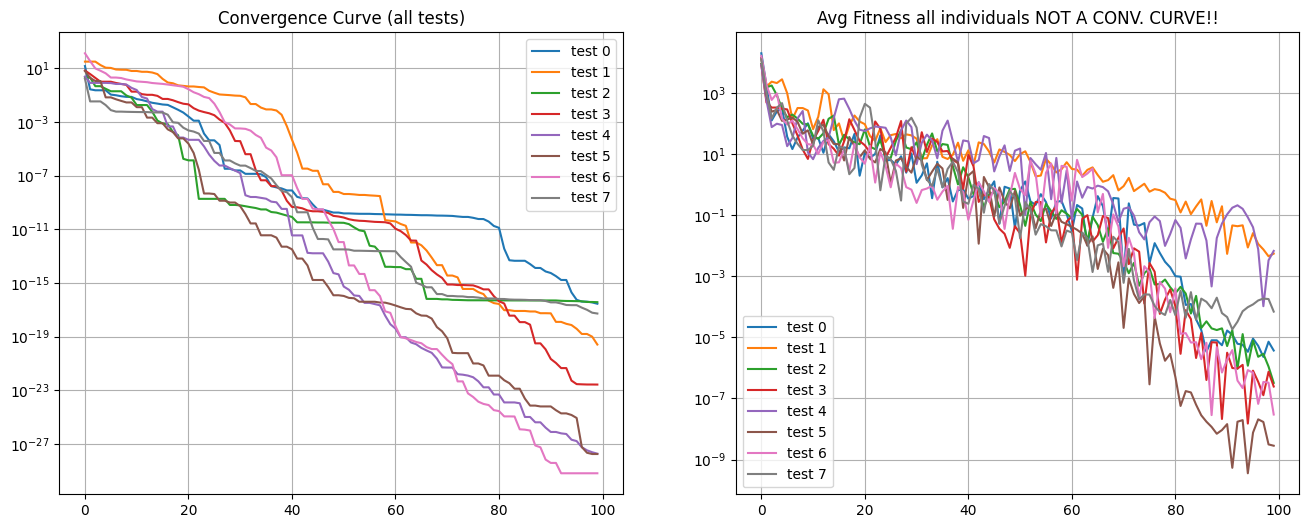

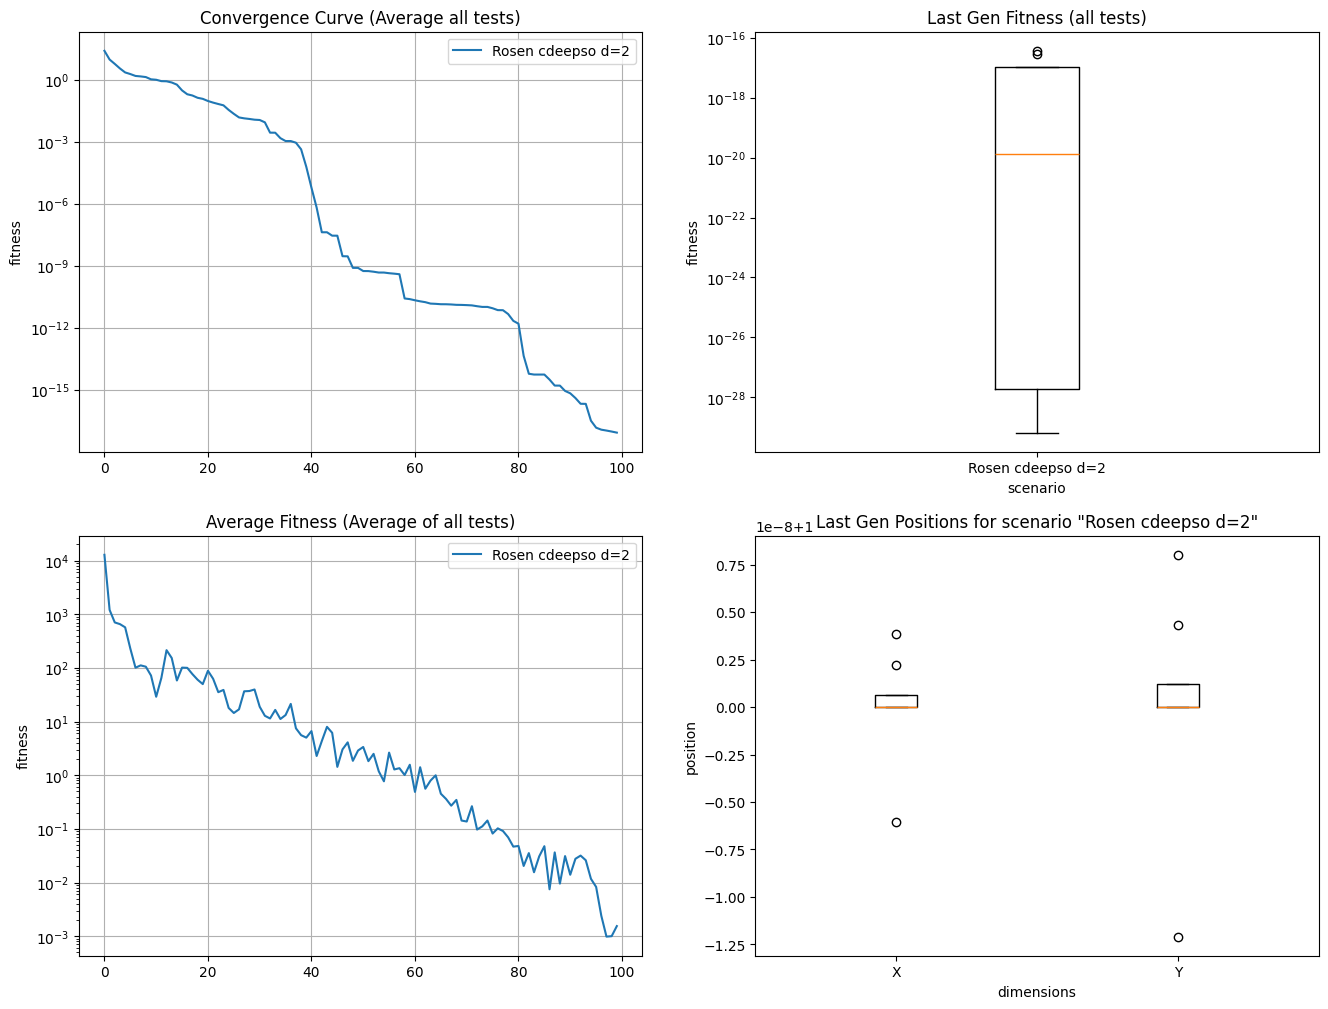

,title,alg,max it,pop size,f_var,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rosen cdeepso d=2,cdeepso,100,30,1.1,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",6.520428e-30,3.697901e-17,8.802749e-18,1.400078e-17


In [153]:
from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO

class Rosenbrock(IndividualCDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rosen cdeepso d=2"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=2
num_tests = 8 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
cdeepso = LoopCDEEPSO(
    title,experiment_name, bounds,
    population_size=population_size,
    f_var=1.1,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(cdeepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

scenario_df

In [90]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rosen deepso d=10"]["fit_min_last"], scenario_table["Rosen cdeepso d=10"]["fit_min_last"])
 
df=scenario_df[["alg","f_var","min","max","mean","std"]]
df=df.join(pd.DataFrame({'P-Value': [p_value,p_value],'T-Stat': [t_stat,t_stat]}))
df

,alg,f_var,min,max,mean,std,P-Value,T-Stat
0,deepso,NaN,0.249586,490.581973,19.447548,40.065659,0.039753,2.063086
1,cdeepso,1.1,0.132890,174.617478,12.909845,19.826251,0.039753,2.063086


In [82]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rosen deepso d=10"]["fit_min_last"], scenario_table["Rosen cdeepso d=10"]["fit_min_last"])
print("T-value:", t_stat)
print("P-value:", p_value)
alpha = 0.05  # significance level
if p_value <= alpha:
    print("The two samples are significantly different.")
else:
    print("The two samples are not significantly different.")


T-value: 2.06308604066159
P-value: 0.03975254401865288
The two samples are significantly different.


## 30 dim

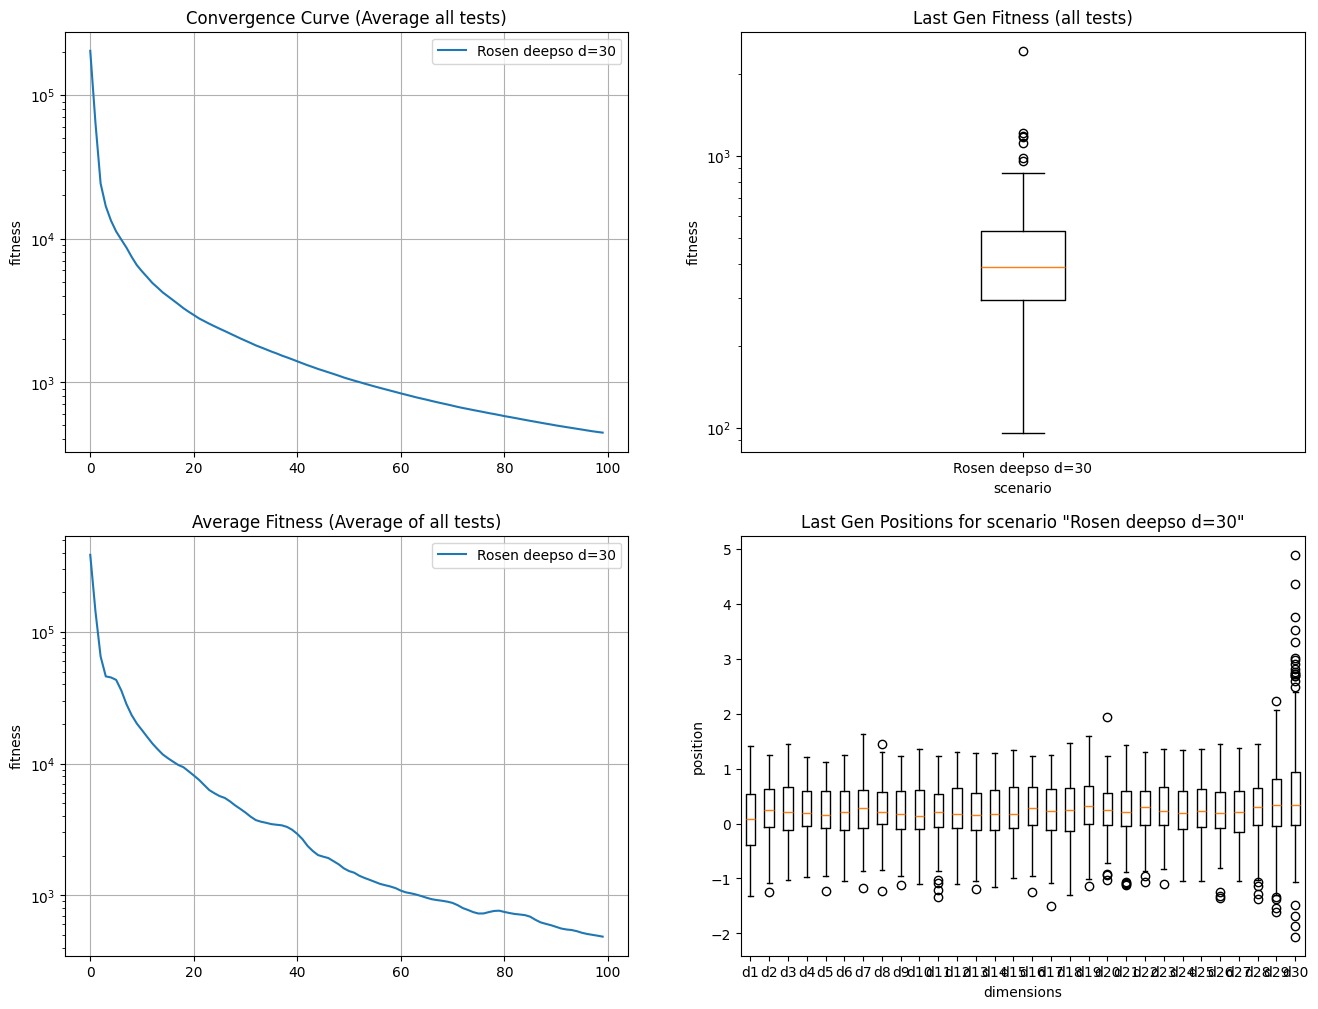

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rosen deepso d=30,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",96.147712,2424.488011,445.252379,246.698662


In [96]:
scenario_table = {}
scenario_df = pd.DataFrame()
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualDEEPSO
import numpy as np
import pandas as pd

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rosen deepso d=30"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=30
num_tests = 200 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(
    title,"deepso_rand_1", bounds,
    population_size=population_size,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = deepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       

for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(deepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")
scenario_df

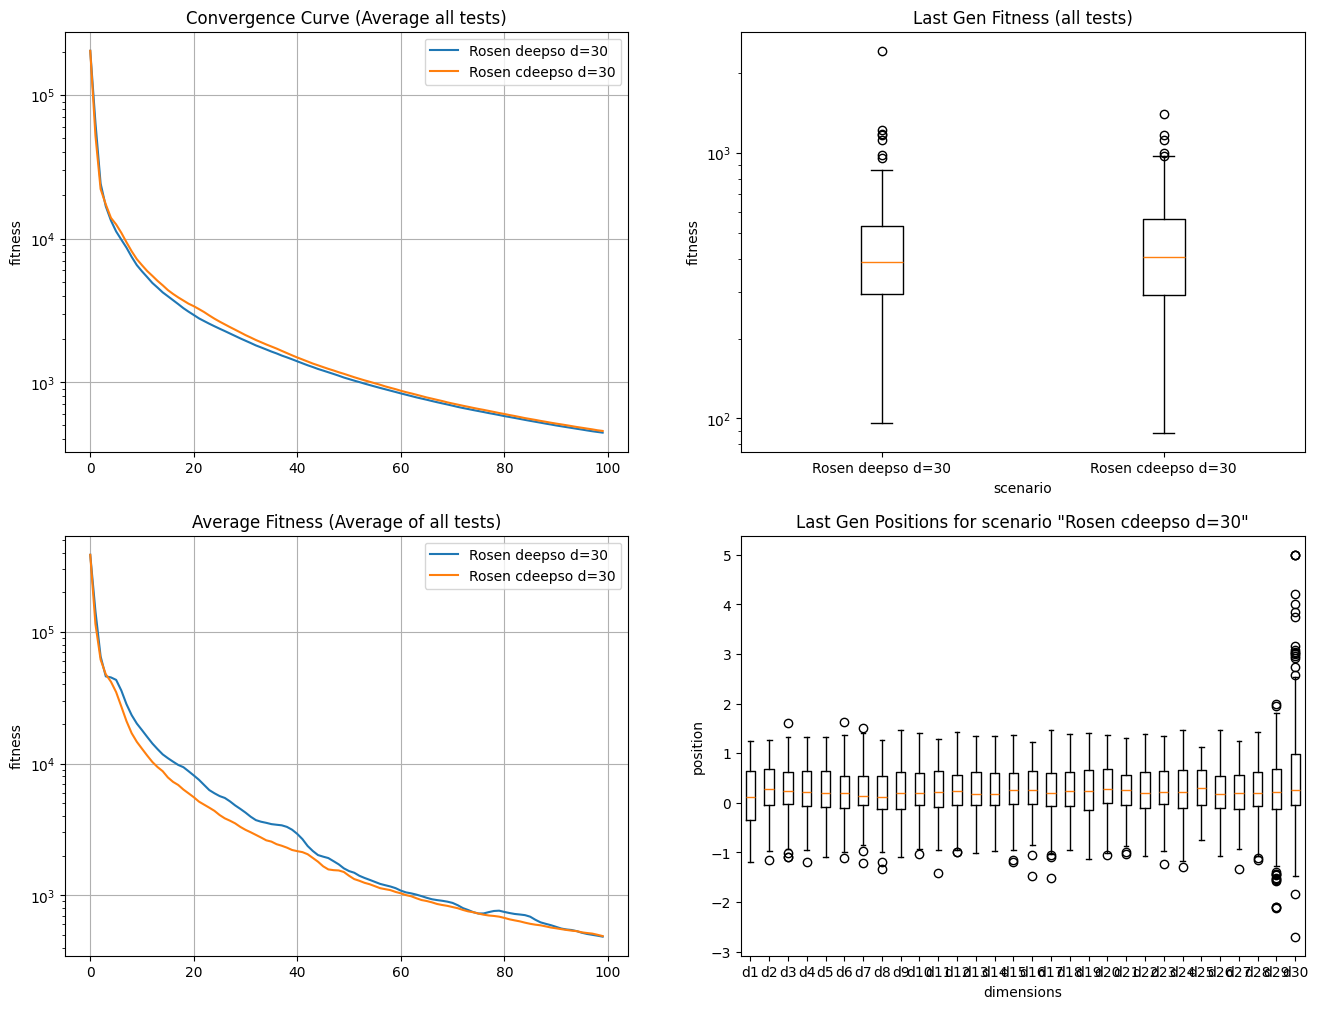

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std,f_var
0,Rosen deepso d=30,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",96.147712,2424.488011,445.252379,246.698662,NaN
1,Rosen cdeepso d=30,cdeepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",88.407389,1405.072927,457.459516,218.194433,1.1


In [97]:
from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO

class Rosenbrock(IndividualCDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rosen cdeepso d=30"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=30
num_tests = 200 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
cdeepso = LoopCDEEPSO(
    title,experiment_name, bounds,
    population_size=population_size,
    f_var=1.1,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(cdeepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

scenario_df

In [99]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rosen deepso d=30"]["fit_min_last"], scenario_table["Rosen cdeepso d=30"]["fit_min_last"])
 
df=scenario_df[["alg","f_var","min","max","mean","std"]]
df=df.join(pd.DataFrame({'P-Value': [p_value,p_value],'T-Stat': [t_stat,t_stat]}))
df

,alg,f_var,min,max,mean,std,P-Value,T-Stat
0,deepso,NaN,96.147712,2424.488011,445.252379,246.698662,0.601361,-0.522862
1,cdeepso,1.1,88.407389,1405.072927,457.459516,218.194433,0.601361,-0.522862


## 50 dimensões

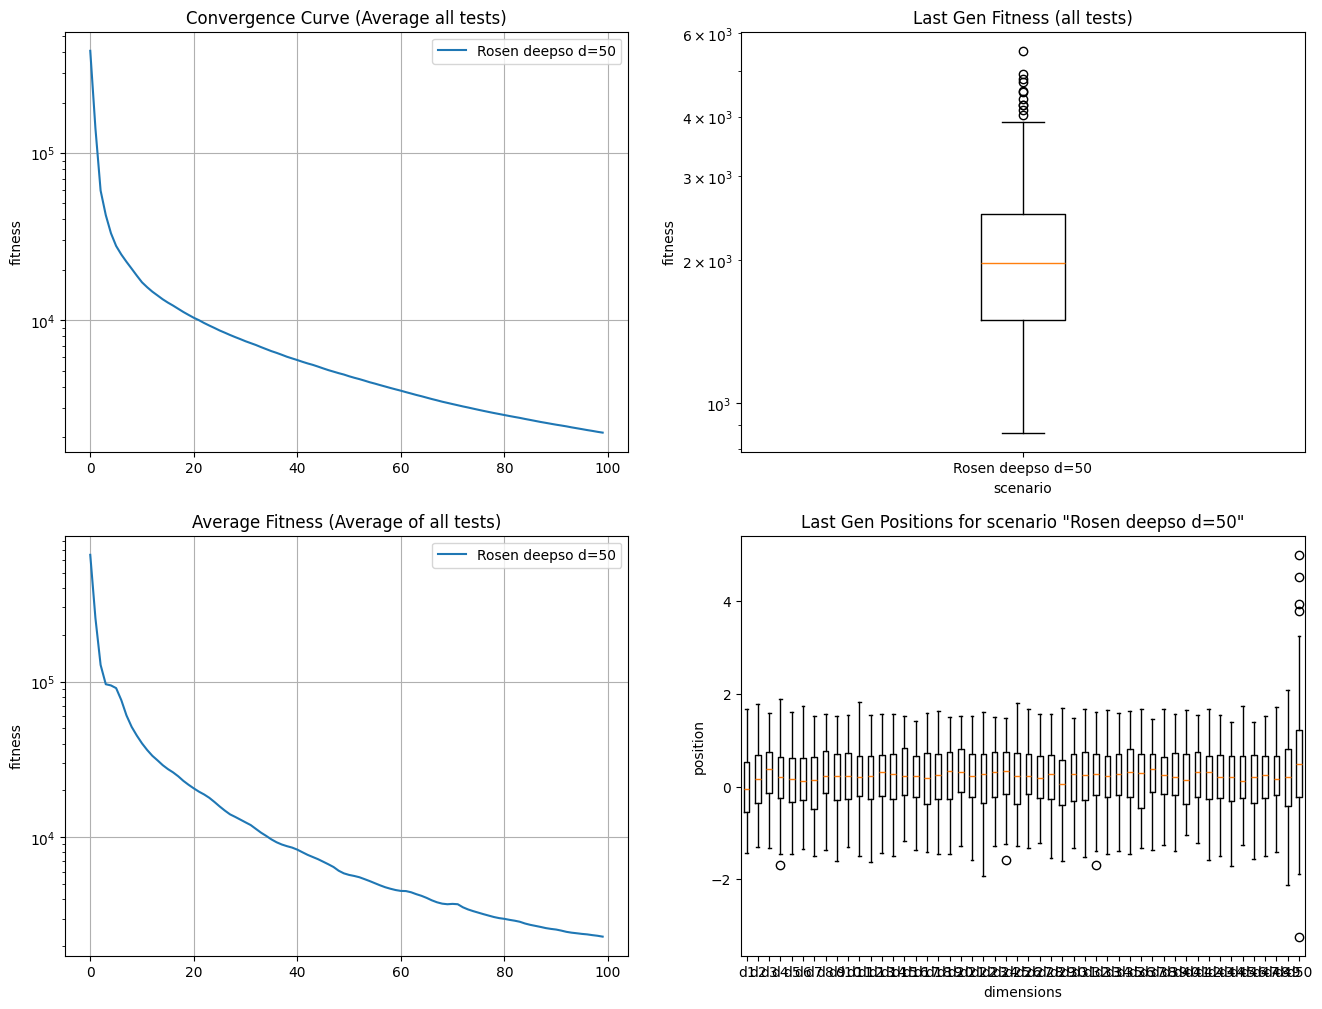

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rosen deepso d=50,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",867.489421,5508.477305,2126.866524,887.344607


In [108]:
scenario_table = {}
scenario_df = pd.DataFrame()
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualDEEPSO
import numpy as np
import pandas as pd

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rosen deepso d=50"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=50
num_tests = 200 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(
    title,"deepso_rand_1", bounds,
    population_size=population_size,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = deepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       

for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(deepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")
scenario_df

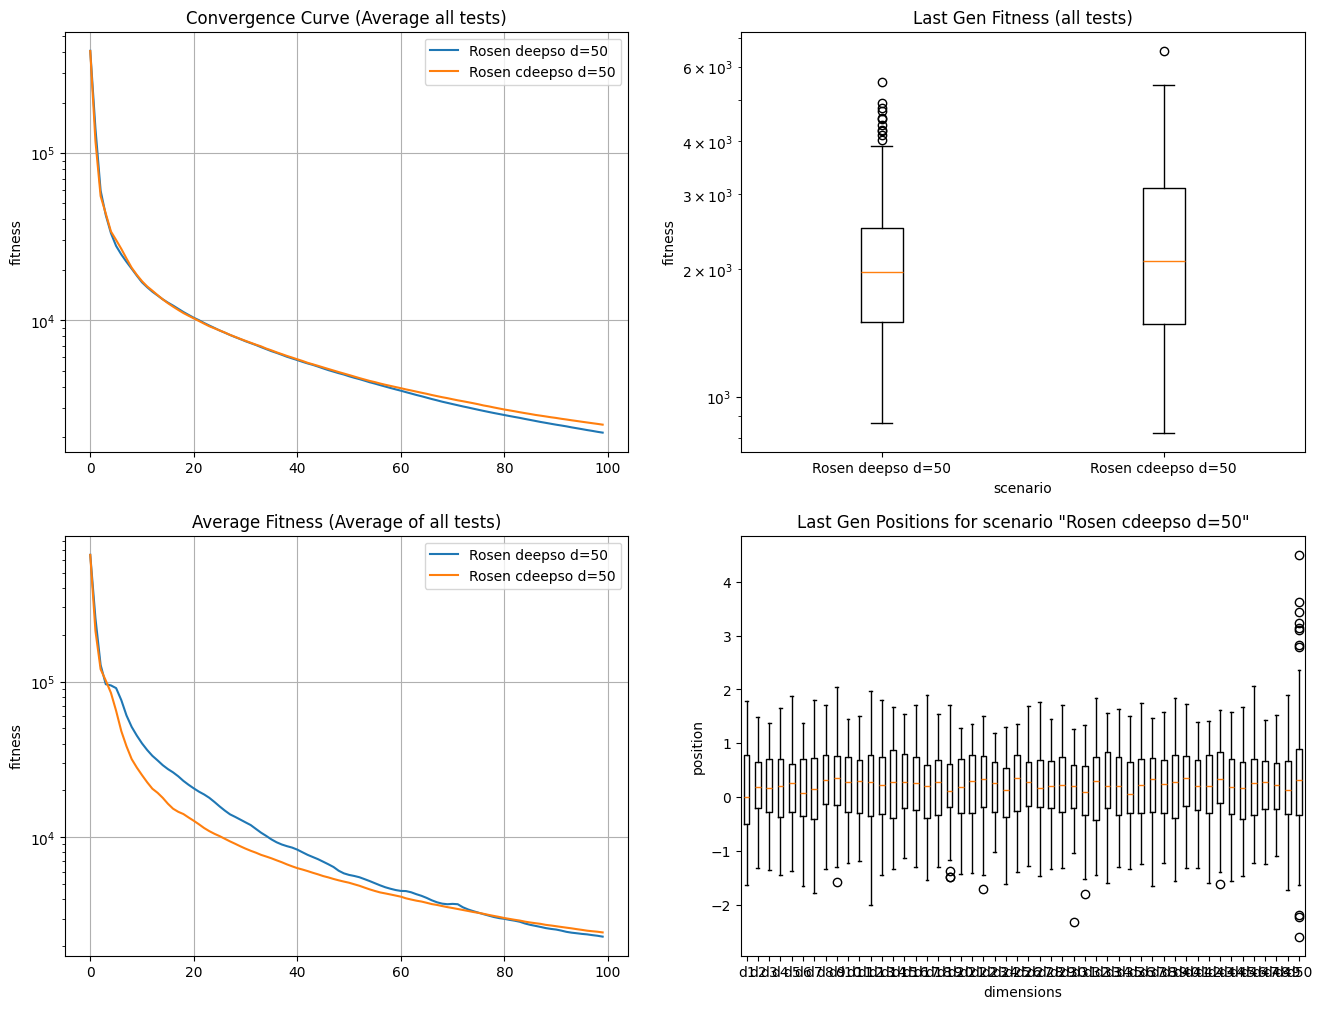

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std,f_var
0,Rosen deepso d=50,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",867.489421,5508.477305,2126.866524,887.344607,NaN
1,Rosen cdeepso d=50,cdeepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",823.125372,6541.011213,2373.799685,1091.025578,0.6


In [113]:
from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO

class Rosenbrock(IndividualCDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rosen cdeepso d=50"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=50
num_tests = 100 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
cdeepso = LoopCDEEPSO(
    title,experiment_name, bounds,
    population_size=population_size,
    f_var=0.6,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(cdeepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

scenario_df

In [112]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rosen deepso d=50"]["fit_min_last"], scenario_table["Rosen cdeepso d=50"]["fit_min_last"])
 
df=scenario_df[["alg","f_var","min","max","mean","std"]]
df=df.join(pd.DataFrame({'P-Value': [p_value,p_value],'T-Stat': [t_stat,t_stat]}))
df

,alg,f_var,min,max,mean,std,P-Value,T-Stat
0,deepso,NaN,867.489421,5508.477305,2126.866524,887.344607,0.008067,-2.667207
1,cdeepso,0.8,763.793789,5416.507492,2420.559159,913.247680,0.008067,-2.667207


# Rastrigin

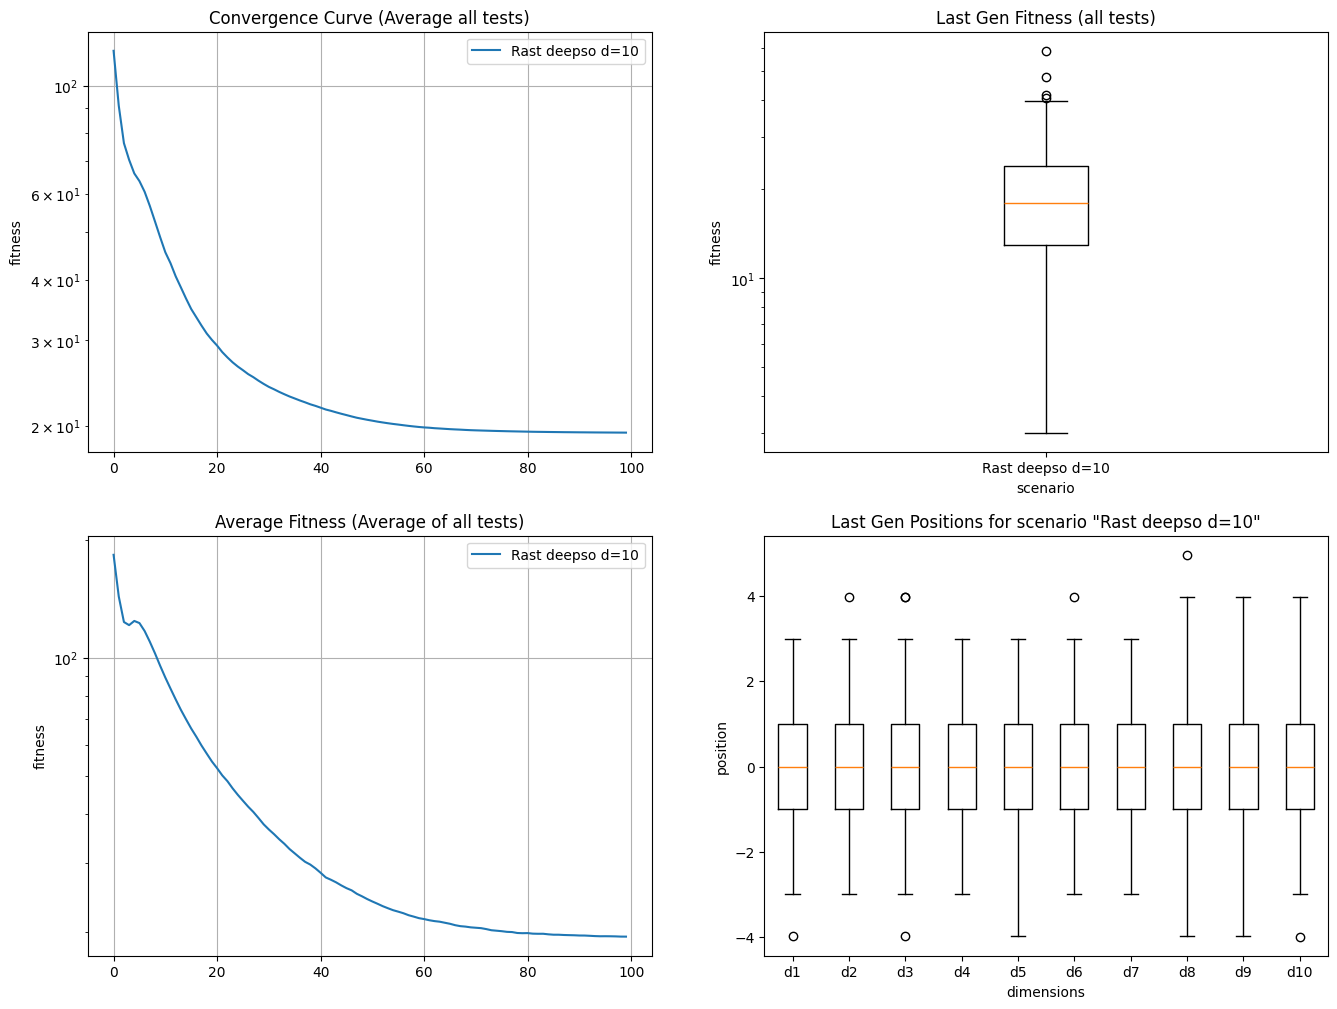

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rast deepso d=10,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",3.004541,58.730646,19.372156,8.892192


In [119]:
scenario_table = {}
scenario_df = pd.DataFrame()

class Rastrigin(IndividualDEEPSO):
  def _fitness_function(self, X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rast deepso d=10"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=10
num_tests = 200 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(
    title,"deepso_rand_1", bounds,
    population_size=population_size,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = deepso.test(coordinates, Rastrigin, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       

for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(deepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")
scenario_df

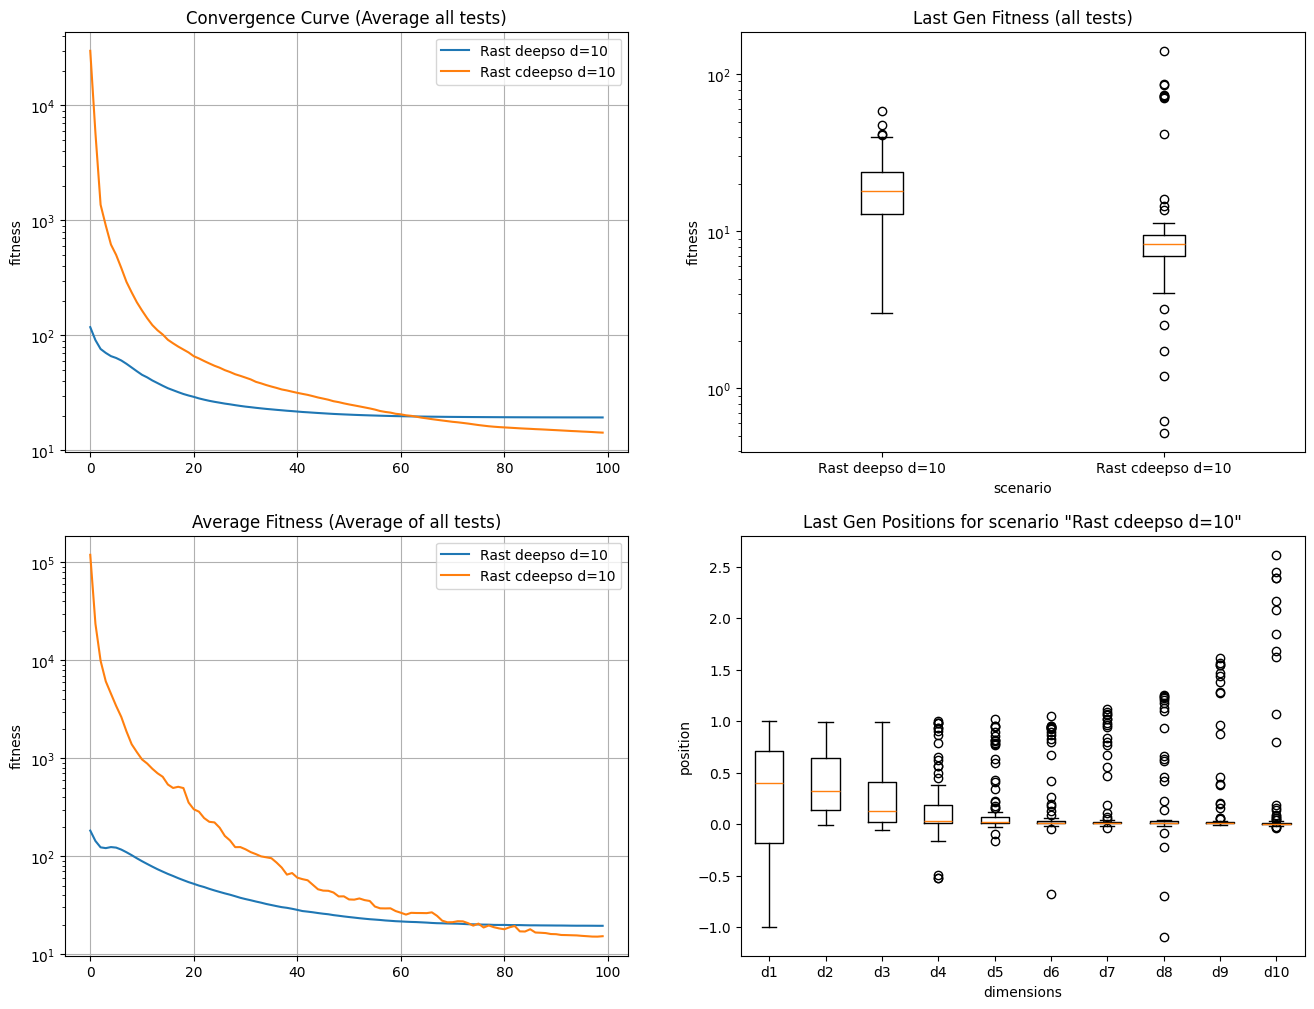

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std,f_var
0,Rast deepso d=10,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",3.004541,58.730646,19.372156,8.892192,NaN
1,Rast cdeepso d=10,cdeepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",0.523204,141.055839,14.293372,22.012805,1.2


In [131]:
from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO

class Rastrigin(IndividualCDEEPSO):
  def _fitness_function(self, X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rast cdeepso d=10"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=10
num_tests = 100 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
cdeepso = LoopCDEEPSO(
    title,experiment_name, bounds,
    population_size=population_size,
    f_var=1.2,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(cdeepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

scenario_df

In [129]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rast deepso d=10"]["fit_min_last"], scenario_table["Rast cdeepso d=10"]["fit_min_last"])
 
df=scenario_df[["alg","f_var","min","max","mean","std"]]
df=df.join(pd.DataFrame({'P-Value': [p_value,p_value],'T-Stat': [t_stat,t_stat]}))
df

,alg,f_var,min,max,mean,std,P-Value,T-Stat
0,deepso,NaN,3.004541,58.730646,19.372156,8.892192,0.005067,2.823685
1,cdeepso,1.2,0.523204,141.055839,14.293372,22.012805,0.005067,2.823685


## dim 30

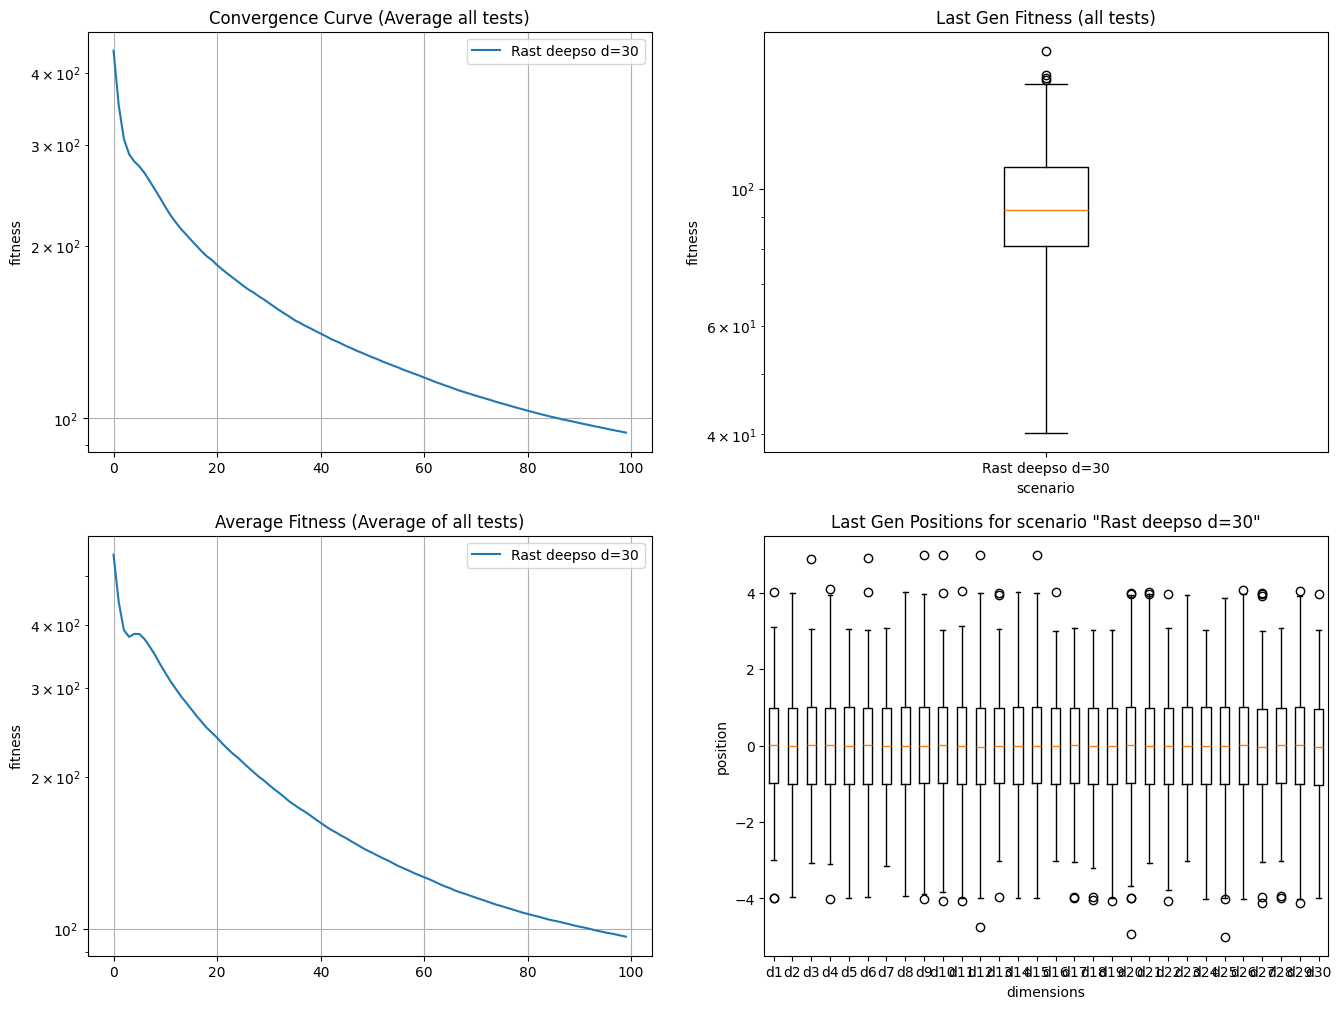

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rast deepso d=30,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",40.218982,167.699391,94.435411,22.345035


In [133]:
scenario_table = {}
scenario_df = pd.DataFrame()

class Rastrigin(IndividualDEEPSO):
  def _fitness_function(self, X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rast deepso d=30"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=30
num_tests = 200 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(
    title,"deepso_rand_1", bounds,
    population_size=population_size,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = deepso.test(coordinates, Rastrigin, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       

for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(deepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")
scenario_df

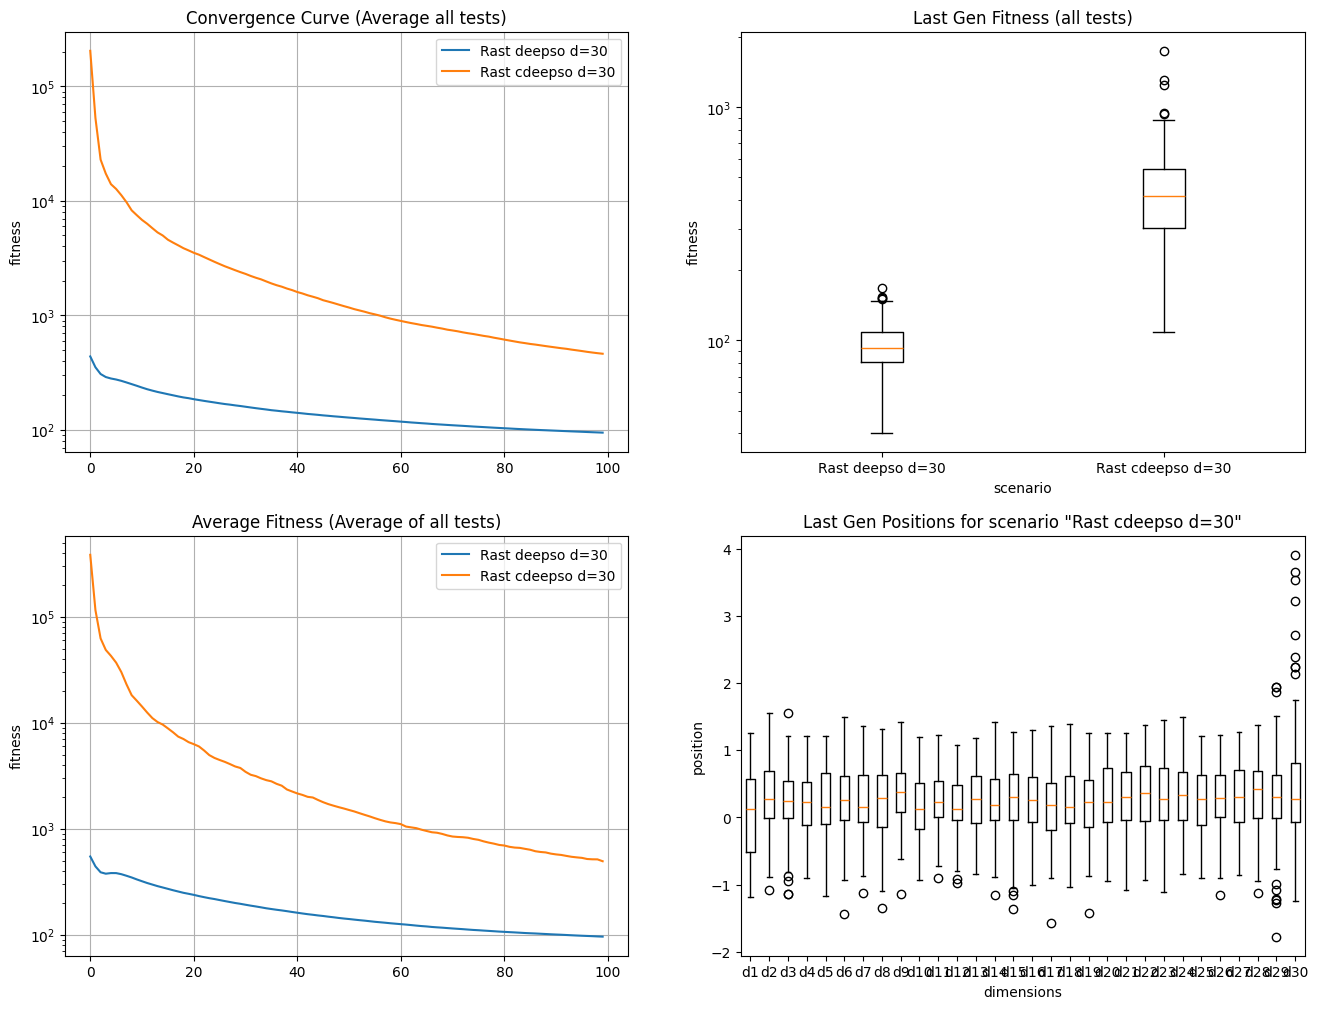

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std,f_var
0,Rast deepso d=30,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",40.218982,167.699391,94.435411,22.345035,NaN
1,Rast cdeepso d=30,cdeepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",108.436688,1744.434511,461.490752,246.149020,1.2


In [136]:
from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO

class Rastrigin(IndividualCDEEPSO):
  def _fitness_function(self, X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rast cdeepso d=30"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=30
num_tests = 100 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
cdeepso = LoopCDEEPSO(
    title,experiment_name, bounds,
    population_size=population_size,
    f_var=1.2,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(cdeepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

scenario_df

In [137]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rast deepso d=30"]["fit_min_last"], scenario_table["Rast cdeepso d=30"]["fit_min_last"])
 
df=scenario_df[["alg","f_var","min","max","mean","std"]]
df=df.join(pd.DataFrame({'P-Value': [p_value,p_value],'T-Stat': [t_stat,t_stat]}))
df

,alg,f_var,min,max,mean,std,P-Value,T-Stat
0,deepso,NaN,40.218982,167.699391,94.435411,22.345035,3.712646e-60,-20.847127
1,cdeepso,1.2,108.436688,1744.434511,461.490752,246.149020,3.712646e-60,-20.847127


# Dim 50

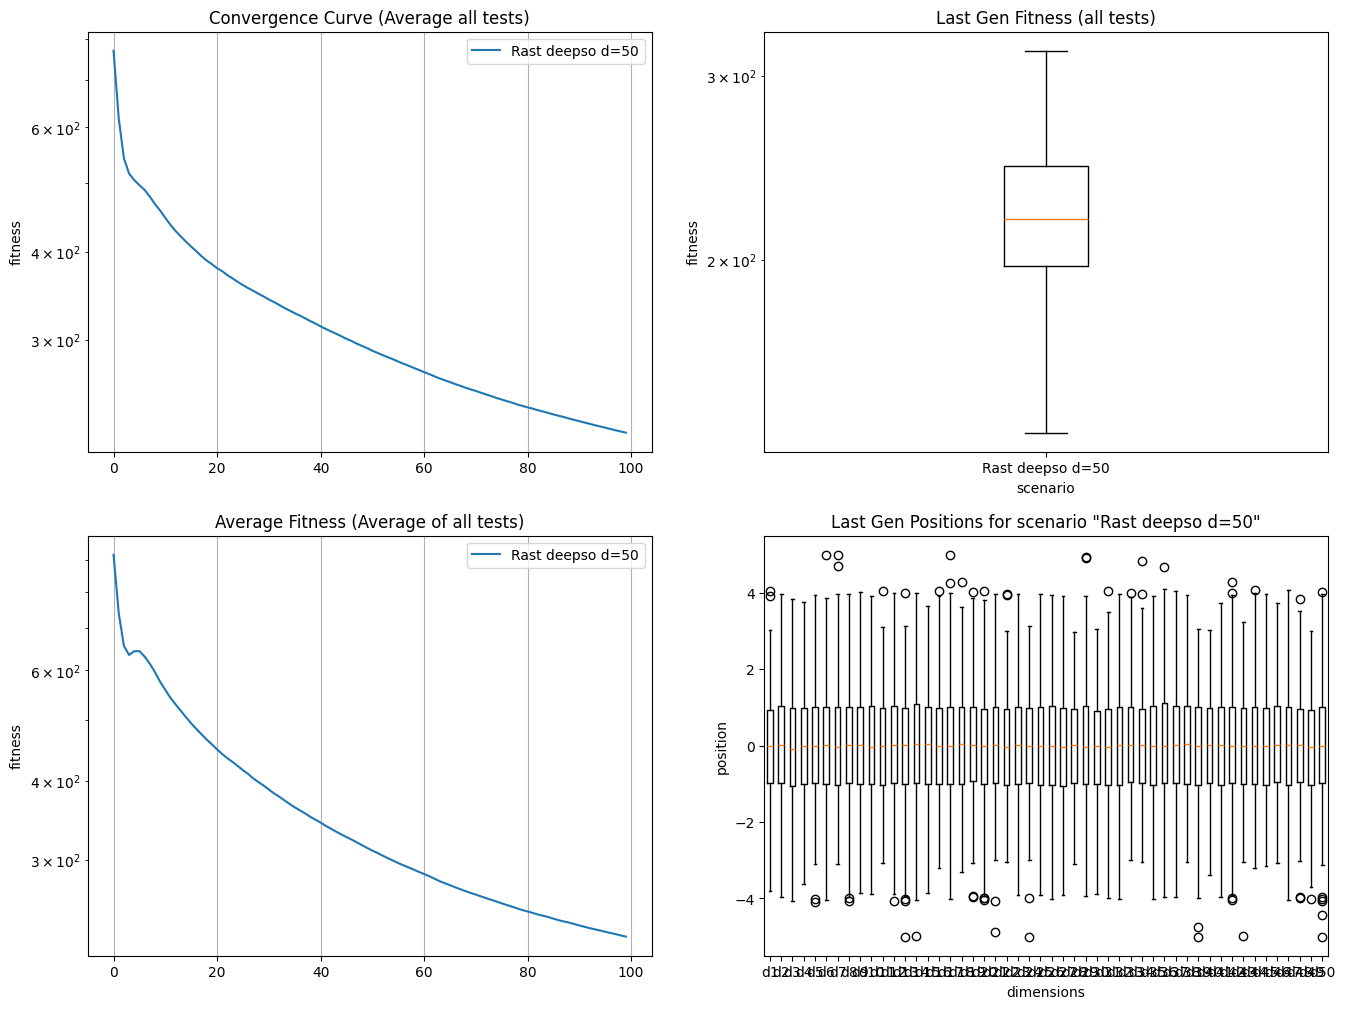

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std
0,Rast deepso d=50,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",136.518026,317.025953,221.941487,35.132625


In [141]:
scenario_table = {}
scenario_df = pd.DataFrame()

class Rastrigin(IndividualDEEPSO):
  def _fitness_function(self, X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rast deepso d=50"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=50
num_tests = 200 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(
    title,"deepso_rand_1", bounds,
    population_size=population_size,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = deepso.test(coordinates, Rastrigin, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       

for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(deepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")
scenario_df

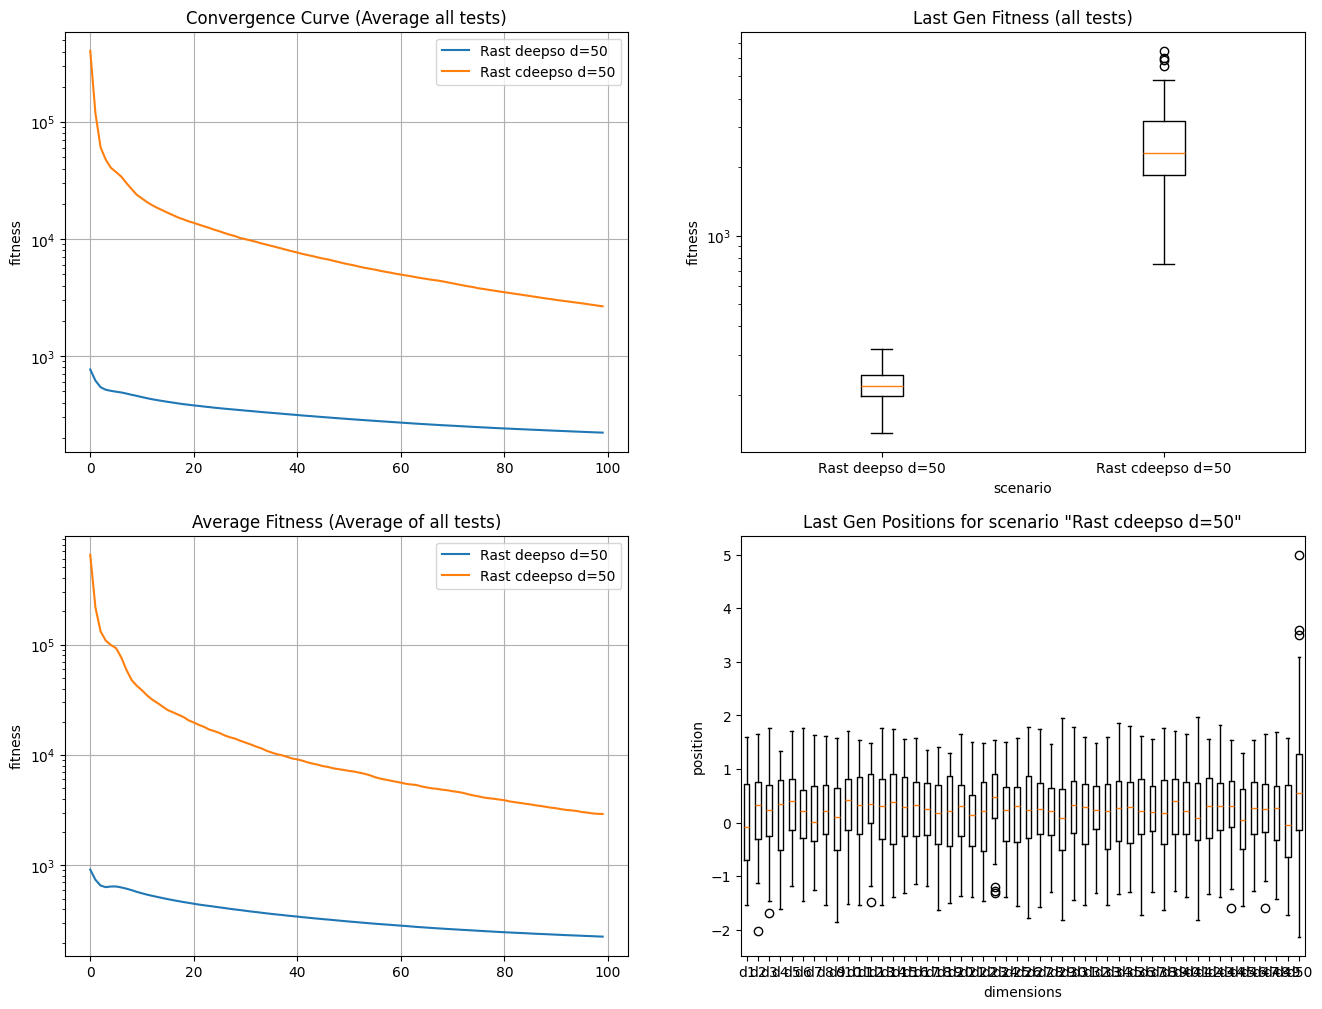

,title,alg,max it,pop size,tmut,tcom,wi0,wa0,wc0,bound,vel bound,w bound,min,max,mean,std,f_var
0,Rast deepso d=50,deepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",136.518026,317.025953,221.941487,35.132625,NaN
1,Rast cdeepso d=50,cdeepso,100,30,0.1,0.9,0.5,0.5,0.5,"[-5, 5]","[-2, 2]","[0, 1]",754.223493,6480.886431,2665.767099,1183.245986,1.2


In [142]:
from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO

class Rastrigin(IndividualCDEEPSO):
  def _fitness_function(self, X):
    n = len(X)
    return 10 * n + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rast cdeepso d=50"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["pos_min_last"] = []
scenario_table[title]["fit_min_last"] = []

# optional collectors for this scenario only
table_test = {}

dimensions=50
num_tests = 100 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
cdeepso = LoopCDEEPSO(
    title,experiment_name, bounds,
    population_size=population_size,
    f_var=1.2,
    max_it=max_it,
    tcom=0.9,
    tmut=0.1,
    velocity_bounds=[-2,2],
    w_bounds=[0,1],
    wi_initial=0.5,
    wa_initial=0.5,
    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=dimensions,seed=num+333)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
scenario_df = collect_data_on_scenario(cdeepso,scenario_table[title], scenario_df, num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

scenario_df

In [143]:
from scipy import stats 
t_stat, p_value = stats.ttest_ind(scenario_table["Rast deepso d=50"]["fit_min_last"], scenario_table["Rast cdeepso d=50"]["fit_min_last"])
 
df=scenario_df[["alg","f_var","min","max","mean","std"]]
df=df.join(pd.DataFrame({'P-Value': [p_value,p_value],'T-Stat': [t_stat,t_stat]}))
df

,alg,f_var,min,max,mean,std,P-Value,T-Stat
0,deepso,NaN,136.518026,317.025953,221.941487,35.132625,4.835580e-89,-29.085407
1,cdeepso,1.2,754.223493,6480.886431,2665.767099,1183.245986,4.835580e-89,-29.085407
